In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import json
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import  roc_curve, auc, silhouette_score, recall_score, precision_score, confusion_matrix, accuracy_score
from sklearn import metrics
%matplotlib inline
sns.set(style="whitegrid")

In [138]:
base_path = 'C:/Users/USUARIO/Documents/Trabajo Final  - Data Science/'

de_videos = pd.read_csv(os.path.join(base_path, 'DEvideos_cc50_202101.csv'))

In [139]:

de_categories = os.path.join(base_path, 'DE_category_id.json')


In [142]:
with open(de_categories, 'r') as f:
    de_categories = pd.DataFrame(json.load(f)['items'])


In [144]:
def extract_category_info(categories_df):
    categories_df = categories_df[['id', 'snippet']]
    categories_df['category_id'] = categories_df['id'].astype(int)
    categories_df['category'] = categories_df['snippet'].apply(lambda x: x['title'])
    return categories_df[['category_id', 'category']]


de_categories = extract_category_info(de_categories)

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_5392\2579554487.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categories_df['category_id'] = categories_df['id'].astype(int)


In [146]:
de_videos.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,state,lat,lon,geometry
0,LgVi6y5QIjM,17.14.11,Sing zu Ende! | Gesangseinlagen vom Feinsten |...,inscope21,24,2017-11-13T17:08:49.000Z,"inscope21|""sing zu ende""|""gesangseinlagen""|""ge...",252786,35885,230,1539,https://i.ytimg.com/vi/LgVi6y5QIjM/default.jpg,False,False,False,Heute gibt es mal wieder ein neues Format... w...,Schleswig Holstein,54.783748,9.433315,POINT (9.433315388 54.78374778)
1,Bayt7uQith4,17.14.11,Kinder ferngesteuert im Kiosk! Erwachsene abzo...,LUKE! Die Woche und ich,23,2017-11-12T22:30:01.000Z,"Kinder|""ferngesteuert""|""Kinder ferngesteuert""|...",797196,53576,302,1278,https://i.ytimg.com/vi/Bayt7uQith4/default.jpg,False,False,False,Kinder ferngesteuert! Kinder lassen sich sooo ...,Nordrhein Westfalen,52.029988,8.530011,POINT (8.530011351000001 52.02998822)
2,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97190,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",Saarland,49.250390,6.970003,POINT (6.970003213 49.25039044)
3,AHtypnRk7JE,17.14.11,Das Fermi-Paradoxon,100SekundenPhysik,27,2017-11-12T15:00:01.000Z,"Physik|""Wissenschaft""|""Technik""|""Science-Ficti...",380247,31821,458,1955,https://i.ytimg.com/vi/AHtypnRk7JE/default.jpg,False,False,False,►Alle Videos: http://bit.ly/1fa7Tw3\n\n\n✚Snap...,Bayern,50.266607,10.966607,POINT (10.96660681 50.26660748)
4,ZJ9We4bjcg0,17.14.11,18 SONGS mit Kelly MissesVlog (Sing-off),rezo,24,2017-11-12T13:10:36.000Z,"kelly|""missesvlog""|""kelly song""|""bausa""|""bausa...",822213,100684,2467,10244,https://i.ytimg.com/vi/ZJ9We4bjcg0/default.jpg,False,False,False,18 Song Mashup über den (veränderten) Beat von...,Berlin,52.521819,13.401549,POINT (13.40154862 52.52181866)


In [148]:
de_videos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40840 entries, 0 to 40839
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   video_id                40840 non-null  object 
 1   trending_date           40840 non-null  object 
 2   title                   40840 non-null  object 
 3   channel_title           40840 non-null  object 
 4   category_id             40840 non-null  int64  
 5   publish_time            40840 non-null  object 
 6   tags                    40840 non-null  object 
 7   views                   40840 non-null  int64  
 8   likes                   40840 non-null  int64  
 9   dislikes                40840 non-null  int64  
 10  comment_count           40840 non-null  int64  
 11  thumbnail_link          40840 non-null  object 
 12  comments_disabled       40840 non-null  bool   
 13  ratings_disabled        40840 non-null  bool   
 14  video_error_or_removed  40840 non-null

In [150]:
# Estructura de los datos
de_videos.dtypes

video_id                   object
trending_date              object
title                      object
channel_title              object
category_id                 int64
publish_time               object
tags                       object
views                       int64
likes                       int64
dislikes                    int64
comment_count               int64
thumbnail_link             object
comments_disabled            bool
ratings_disabled             bool
video_error_or_removed       bool
description                object
state                      object
lat                       float64
lon                       float64
geometry                   object
dtype: object

In [ ]:
# Cantidad de los datos
df.shape

<Axes: >

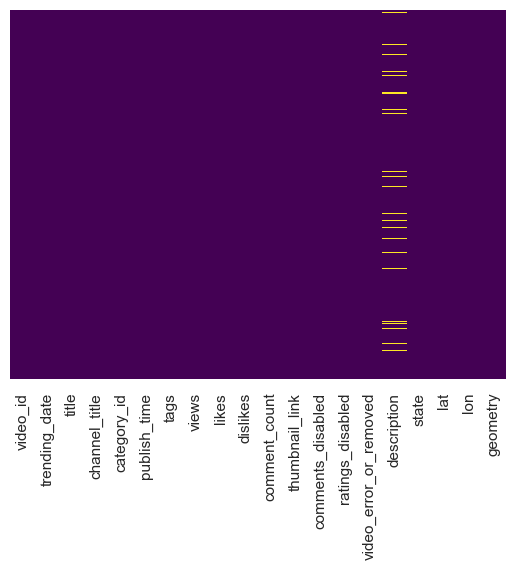

In [134]:
sns.heatmap(de_videos.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [98]:
# Eliminar duplicados

de_videos.drop_duplicates(inplace=True)

# Manejar valores nulos
de_videos.fillna(0, inplace=True)


In [102]:
# Número de datos ausentes por variable
# ==============================================================================
de_videos.isna().sum().sort_values()

video_id                  0
lat                       0
state                     0
description               0
video_error_or_removed    0
ratings_disabled          0
comments_disabled         0
thumbnail_link            0
comment_count             0
dislikes                  0
likes                     0
views                     0
tags                      0
publish_time              0
category_id               0
channel_title             0
title                     0
trending_date             0
lon                       0
geometry                  0
dtype: int64

In [105]:
def trending_categories(videos, categories):
    cat_count = videos['category_id'].value_counts().reset_index()
    cat_count.columns = ['category_id', 'count']
    cat_count = cat_count.merge(categories, on='category_id')
    return cat_count


de_trending = trending_categories(de_videos, de_categories)

print("Trending Categories:")

print(de_trending)


Trending Categories:
    category_id  count              category
0            24  15292         Entertainment
1            22   5988        People & Blogs
2            25   2935       News & Politics
3            17   2752                Sports
4            23   2534                Comedy
5             1   2376      Film & Animation
6            10   2372                 Music
7            26   1745         Howto & Style
8            20   1565                Gaming
9             2    873      Autos & Vehicles
10           27    844             Education
11           28    806  Science & Technology
12           15    251        Pets & Animals
13           19    141       Travel & Events
14           43    107                 Shows
15           30      2                Movies
16           44      1              Trailers


In [106]:
def likes_dislikes_by_category(videos, categories):
    likes_dislikes = videos.groupby('category_id')[['likes', 'dislikes']].sum().reset_index()
    likes_dislikes = likes_dislikes.merge(categories, on='category_id')
    return likes_dislikes

de_likes_dislikes = likes_dislikes_by_category(de_videos, de_categories)

print("\nLikes and Dislikes by Category:")
print(de_likes_dislikes)





Likes and Dislikes by Category:
    category_id      likes  dislikes              category
0             1   45315546   1864876      Film & Animation
1             2    6143363    182704      Autos & Vehicles
2            10  300297066  12985188                 Music
3            15    3351052     81919        Pets & Animals
4            17   37646423   2153755                Sports
5            19     887036     30503       Travel & Events
6            20   28868280   1984458                Gaming
7            22   60920058   4544157        People & Blogs
8            23   74787405   2557861                Comedy
9            24  267752272  22485534         Entertainment
10           25   14391904   2369587       News & Politics
11           26   15101881    739287         Howto & Style
12           27    7516778    234168             Education
13           28   15372868    737165  Science & Technology
14           30      63834      2594                Movies
15           43     378

In [109]:
def like_dislike_ratio(videos, categories):
    ratios = videos.groupby('category_id').apply(lambda x: (x['likes'].sum() / x['dislikes'].sum() if x['dislikes'].sum() > 0 else np.nan)).reset_index()
    ratios.columns = ['category_id', 'like_dislike_ratio']
    ratios = ratios.merge(categories, on='category_id')
    return ratios


de_ratios = like_dislike_ratio(de_videos, de_categories)


print("\nLike-Dislike Ratios:")

print(de_ratios)



Like-Dislike Ratios:
    category_id  like_dislike_ratio              category
0             1           24.299496      Film & Animation
1             2           33.624677      Autos & Vehicles
2            10           23.126124                 Music
3            15           40.906896        Pets & Animals
4            17           17.479436                Sports
5            19           29.080287       Travel & Events
6            20           14.547186                Gaming
7            22           13.406240        People & Blogs
8            23           29.238260                Comedy
9            24           11.907757         Entertainment
10           25            6.073592       News & Politics
11           26           20.427630         Howto & Style
12           27           32.099937             Education
13           28           20.854039  Science & Technology
14           30           24.608327                Movies
15           43            3.834860               

In [110]:

def view_comment_ratio(videos, categories):
    ratios = videos.groupby('category_id').apply(lambda x: (x['views'].sum() / x['comment_count'].sum() if x['comment_count'].sum() > 0 else np.nan)).reset_index()
    ratios.columns = ['category_id', 'view_comment_ratio']
    ratios = ratios.merge(categories, on='category_id')
    return ratios

de_view_comment = view_comment_ratio(de_videos, de_categories)

print("\nView-Comment Ratios:")

print(de_view_comment)



View-Comment Ratios:
    category_id  view_comment_ratio              category
0             1          326.170948      Film & Animation
1             2          277.118741      Autos & Vehicles
2            10          191.881106                 Music
3            15          139.366880        Pets & Animals
4            17          459.245372                Sports
5            19          186.954346       Travel & Events
6            20          142.299768                Gaming
7            22          245.942828        People & Blogs
8            23          185.513320                Comedy
9            24          222.067874         Entertainment
10           25          206.504210       News & Politics
11           26          330.514588         Howto & Style
12           27          161.999872             Education
13           28          166.273533  Science & Technology
14           30          945.215143                Movies
15           43          754.453303               

In [111]:
def trending_over_time(videos):
    videos['trending_date'] = pd.to_datetime(videos['trending_date'], format='%y.%d.%m')
    trends = videos.groupby(videos['trending_date'].dt.to_period('M')).size().reset_index(name='count')
    return trends

de_trends_time = trending_over_time(de_videos)

print("\nTrending over Time - DE:")
print(de_trends_time)



Trending over Time - DE:
  trending_date  count
0       2017-11   3399
1       2017-12   6199
2       2018-01   5793
3       2018-02   5568
4       2018-03   6183
5       2018-04   4793
6       2018-05   6142
7       2018-06   2763


In [49]:
def trending_channels(videos):
    channels = videos['channel_title'].value_counts().reset_index()
    channels.columns = ['channel_title', 'count']
    return channels


de_channels = trending_channels(de_videos)


print("de_channels")
print(de_channels)

de_channels
                              channel_title  count
0                                   Galileo    200
1                             Ruhrpottwache    185
2                            Анатолий Шарий    182
3                                     Çukur    180
4                               Auf Streife    180
...                                     ...    ...
6080                         BroSep Fitness      1
6081  Kevkowich - Attack on Titan und Mehr!      1
6082                    Geil also finde ich      1
6083                          MürderBeatzTV      1
6084                       DailyProFootball      1

[6085 rows x 2 columns]


State (DE): 
                      state       views     likes  dislikes
5                  Hamburg  1783092057  66910220   4738807
15               Thuringen  1699481366  59744290   5008621
10         Rheinland Pfalz  1671164998  58850488   3473871
6                   Hessen  1667128104  60710403   3947336
14      Schleswig Holstein  1622083319  59003927   4753612
9      Nordrhein Westfalen  1573548930  57393466   3105419
4                   Bremen  1556155587  61946034   3852057
12                 Sachsen  1544022118  50669975   3329905
0        Baden Wurttemberg  1542170061  53931077   2926202
2                   Berlin  1535553735  60643112   3329344
13          Sachsen Anhalt  1493986515  53964695   3748187
8            Niedersachsen  1479583990  54795154   3146103
1                   Bayern  1456903369  56428535   2952057
3              Brandenburg  1416692239  48026671   3110545
7   Mecklenburg Vorpommern  1311564024  43428763   2990948
11                Saarland  1291984793  46

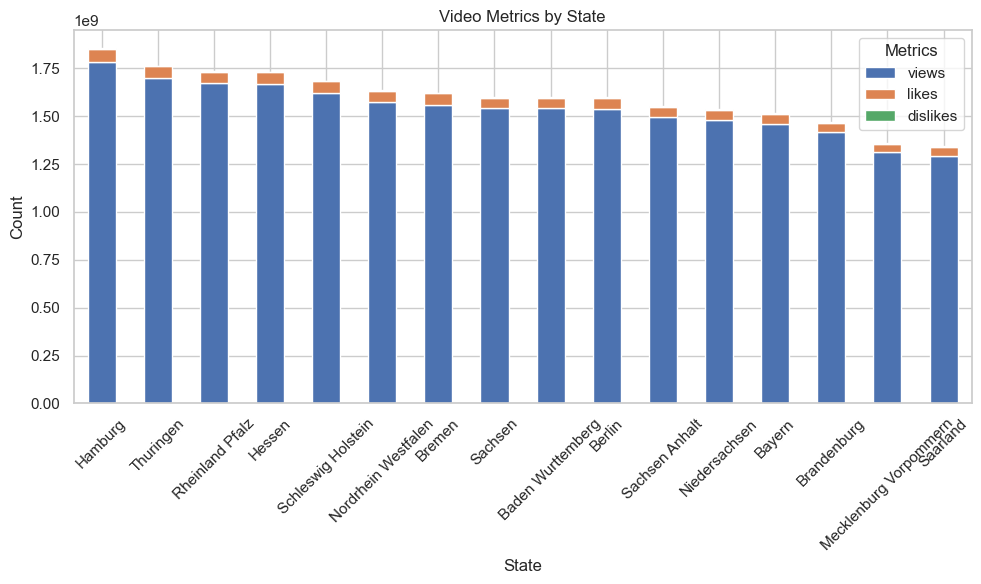

In [51]:
def video_state(videos):
    state_metrics = videos.groupby('state')[['views', 'likes', 'dislikes']].sum().reset_index()
    return state_metrics.sort_values(by='views', ascending=False)

# Obtener los datos procesados
de_state = video_state(de_videos)

# Imprimir los datos
print("State (DE): \n", de_state)

# Crear el gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))

# Crear el gráfico de barras apiladas
de_state.plot(kind='bar', x='state', stacked=True, ax=ax)

# Añadir etiquetas y título
plt.xlabel('State')
plt.ylabel('Count')
plt.title('Video Metrics by State')
plt.xticks(rotation=45)
plt.legend(title='Metrics')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [52]:
def video_state(videos):
    state_metrics = videos.groupby('state')[['views', 'likes', 'dislikes']].sum().reset_index()
    return state_metrics.sort_values(by='views', ascending=False)

de_state=video_state(de_videos)
print("State (DE): \n", de_state)

State (DE): 
                      state       views     likes  dislikes
5                  Hamburg  1783092057  66910220   4738807
15               Thuringen  1699481366  59744290   5008621
10         Rheinland Pfalz  1671164998  58850488   3473871
6                   Hessen  1667128104  60710403   3947336
14      Schleswig Holstein  1622083319  59003927   4753612
9      Nordrhein Westfalen  1573548930  57393466   3105419
4                   Bremen  1556155587  61946034   3852057
12                 Sachsen  1544022118  50669975   3329905
0        Baden Wurttemberg  1542170061  53931077   2926202
2                   Berlin  1535553735  60643112   3329344
13          Sachsen Anhalt  1493986515  53964695   3748187
8            Niedersachsen  1479583990  54795154   3146103
1                   Bayern  1456903369  56428535   2952057
3              Brandenburg  1416692239  48026671   3110545
7   Mecklenburg Vorpommern  1311564024  43428763   2990948
11                Saarland  1291984793  46

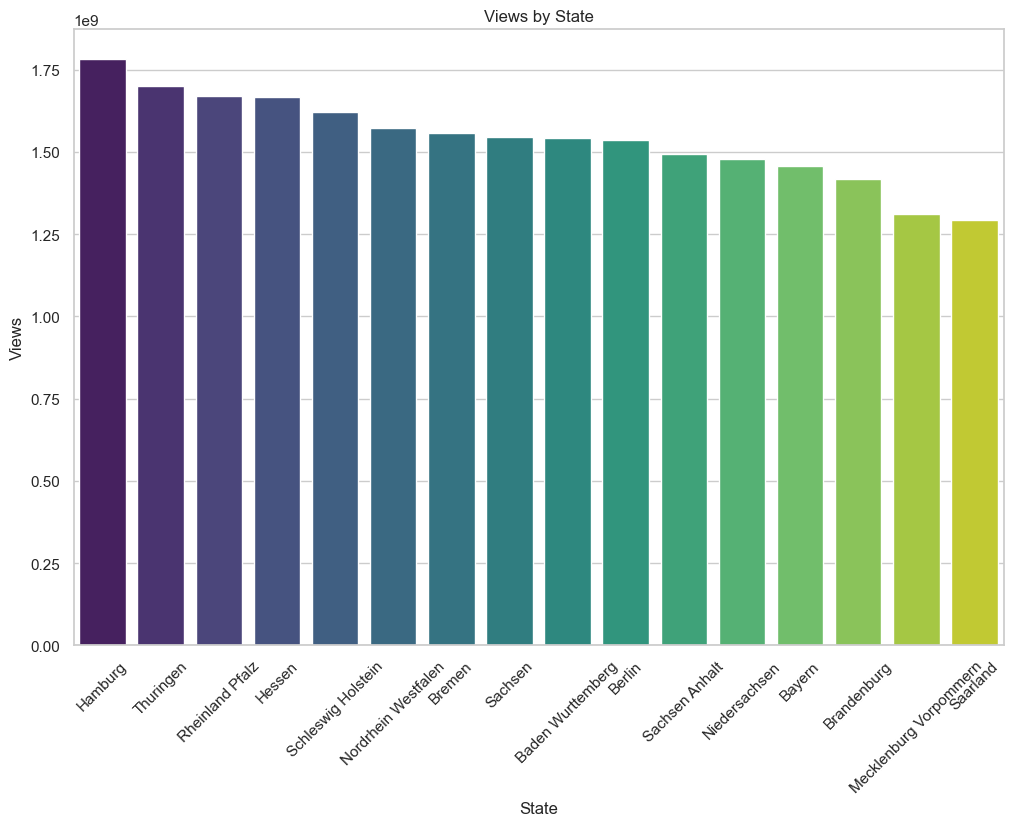

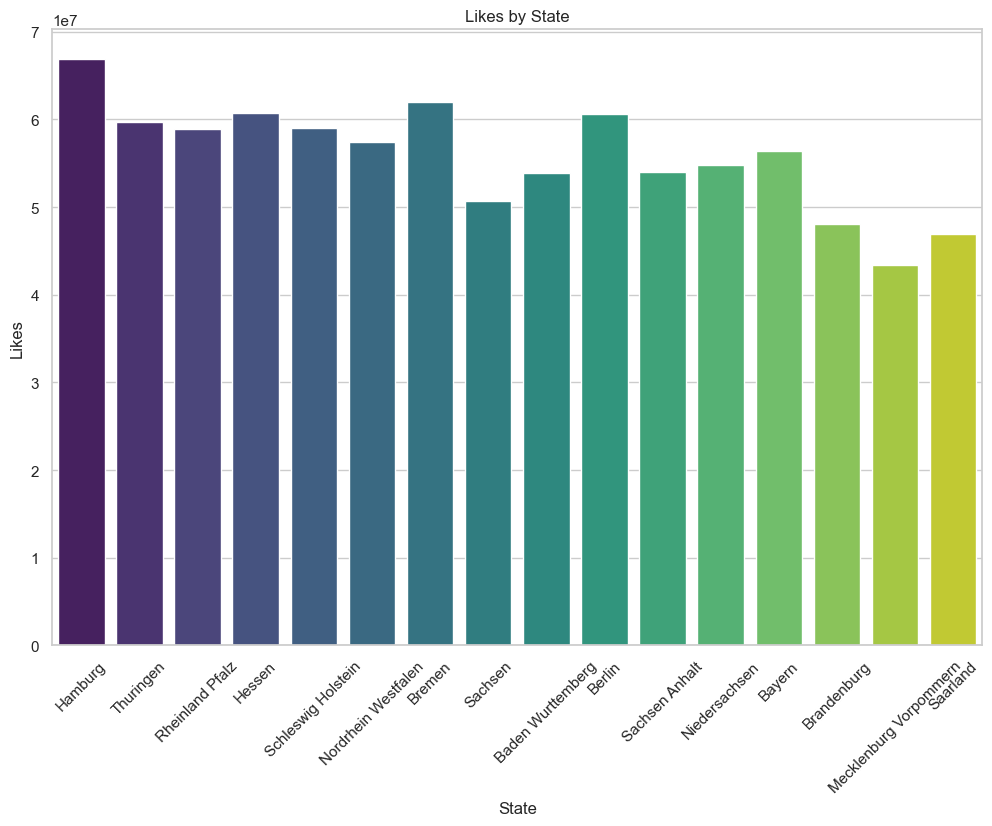

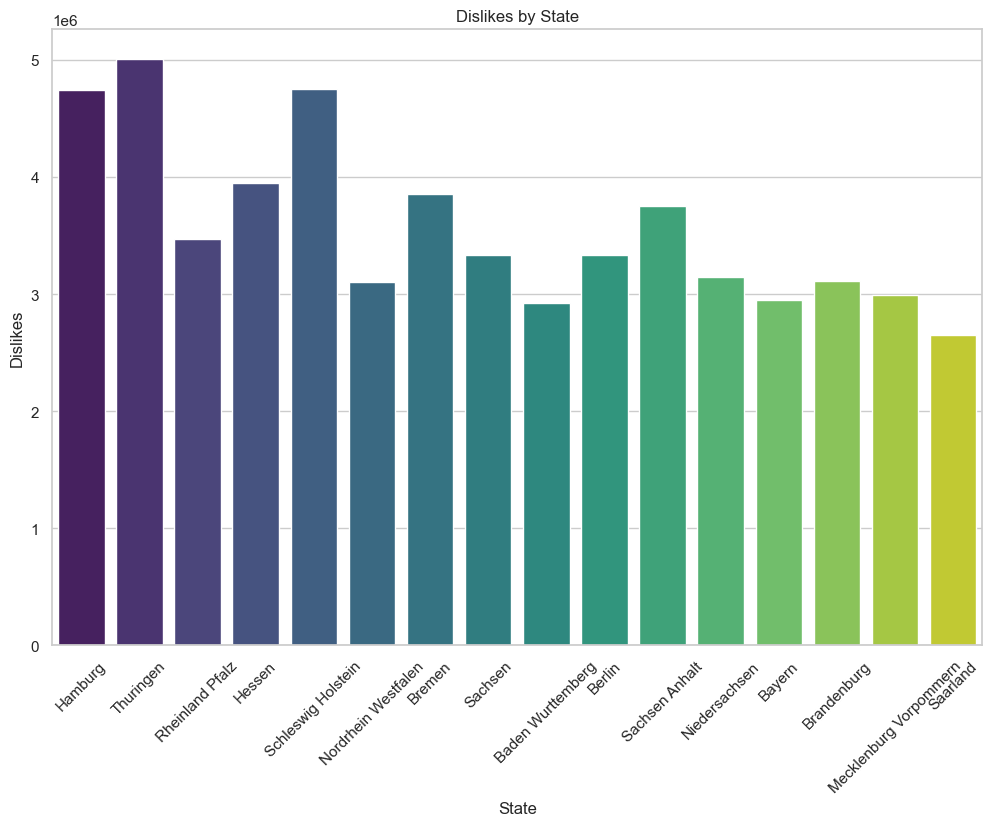

In [55]:
def metrica_por_pais(state_metrics, metric, title, xlabel, ylabel):
    plt.figure(figsize=(12, 8))
    sns.barplot(data=state_metrics, x='state', y=metric, palette='viridis')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=45)
    plt.show()

# Llamadas correctas a las funciones para graficar
metrica_por_pais(de_state, 'views', 'Views by State', 'State', 'Views')
metrica_por_pais(de_state, 'likes', 'Likes by State', 'State', 'Likes')
metrica_por_pais(de_state, 'dislikes', 'Dislikes by State', 'State', 'Dislikes')

In [118]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

def predict_likes(videos):
    X = videos[['views', 'comment_count', 'dislikes']]
    y = videos['likes']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    return predictions, y_test

de_predictions, de_actual = predict_likes(de_videos)
print(de_predictions[:10],de_actual[:10])

[ 2412.16827074  1970.95233009   622.45393162   604.19603053
  1492.90364846 22295.74100967  1898.26060381  6869.62338455
  1304.41019111   885.731205  ] 8969      2915
7745      2295
879        126
34290      231
21866     1319
39719    29795
13298     1615
8648      8475
16809      594
32640        0
Name: likes, dtype: int64


In [58]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

def predict_likes(videos):
    X = videos[['views', 'comment_count', 'dislikes']]
    y = videos['likes']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    return predictions, y_test

de_predictions, de_actual = predict_likes(de_videos)

# Convertir ca_actual a una lista para imprimir correctamente
de_actual_list = de_actual.tolist()

# Imprimir las primeras 10 predicciones y las primeras 10 etiquetas reales
for pred, actual in zip(de_predictions[:10], de_actual_list[:10]):
    print(f"Predicted: {pred:.2f}, Actual: {actual}")

Predicted: 2412.17, Actual: 2915
Predicted: 1970.95, Actual: 2295
Predicted: 622.45, Actual: 126
Predicted: 604.20, Actual: 231
Predicted: 1492.90, Actual: 1319
Predicted: 22295.74, Actual: 29795
Predicted: 1898.26, Actual: 1615
Predicted: 6869.62, Actual: 8475
Predicted: 1304.41, Actual: 594
Predicted: 885.73, Actual: 0


In [60]:
# Convertir la columna 'trending_date' al formato de fecha adecuado
def convert_date_format(df):
    df['trending_date'] = pd.to_datetime(df['trending_date'], format='%y.%d.%m')
    df['publish_time'] = pd.to_datetime(df['publish_time'])
    return df


de_videos = convert_date_format(de_videos)


In [62]:
# Crear nuevas columnas 'year' y 'month' a partir de 'trending_date'
def add_date_features(df):
    df['trending_year'] = df['trending_date'].dt.year
    df['trending_month'] = df['trending_date'].dt.month
    return df


de_videos = add_date_features(de_videos)



In [64]:
# Crear la métrica 'like_dislike_ratio' y 'view_comment_ratio'
def create_new_metrics(df):
    df['like_dislike_ratio'] = df.apply(lambda x: x['likes'] / x['dislikes'] if x['dislikes'] > 0 else np.nan, axis=1)
    df['view_comment_ratio'] = df.apply(lambda x: x['views'] / x['comment_count'] if x['comment_count'] > 0 else np.nan, axis=1)
    return df


de_videos = create_new_metrics(de_videos)


C:\Users\USUARIO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


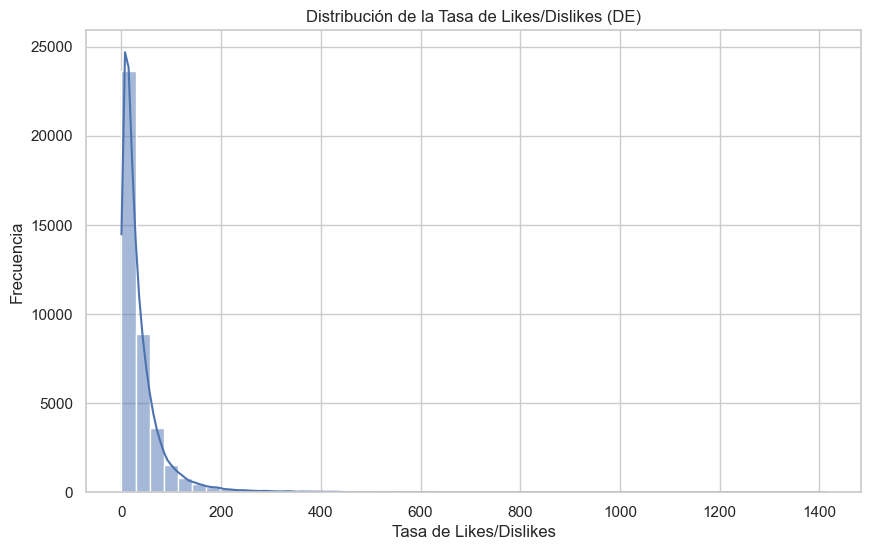

C:\Users\USUARIO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


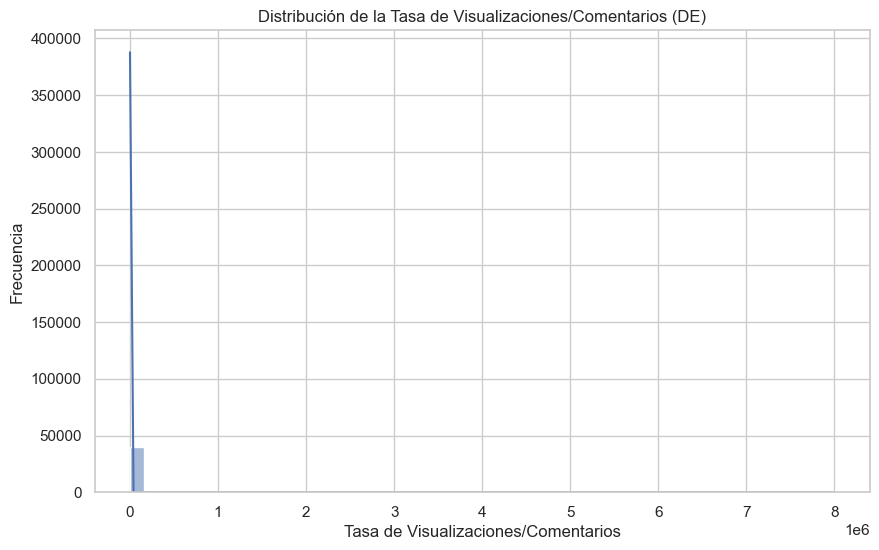

In [66]:
# Gráfico de la distribución de 'like_dislike_ratio'
plt.figure(figsize=(10, 6))
sns.histplot(de_videos['like_dislike_ratio'], bins=50, kde=True)
plt.title('Distribución de la Tasa de Likes/Dislikes (DE)')
plt.xlabel('Tasa de Likes/Dislikes')
plt.ylabel('Frecuencia')
plt.show()

# Gráfico de la distribución de 'view_comment_ratio'
plt.figure(figsize=(10, 6))
sns.histplot(de_videos['view_comment_ratio'], bins=50, kde=True)
plt.title('Distribución de la Tasa de Visualizaciones/Comentarios (DE)')
plt.xlabel('Tasa de Visualizaciones/Comentarios')
plt.ylabel('Frecuencia')
plt.show()


C:\Users\USUARIO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\USUARIO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


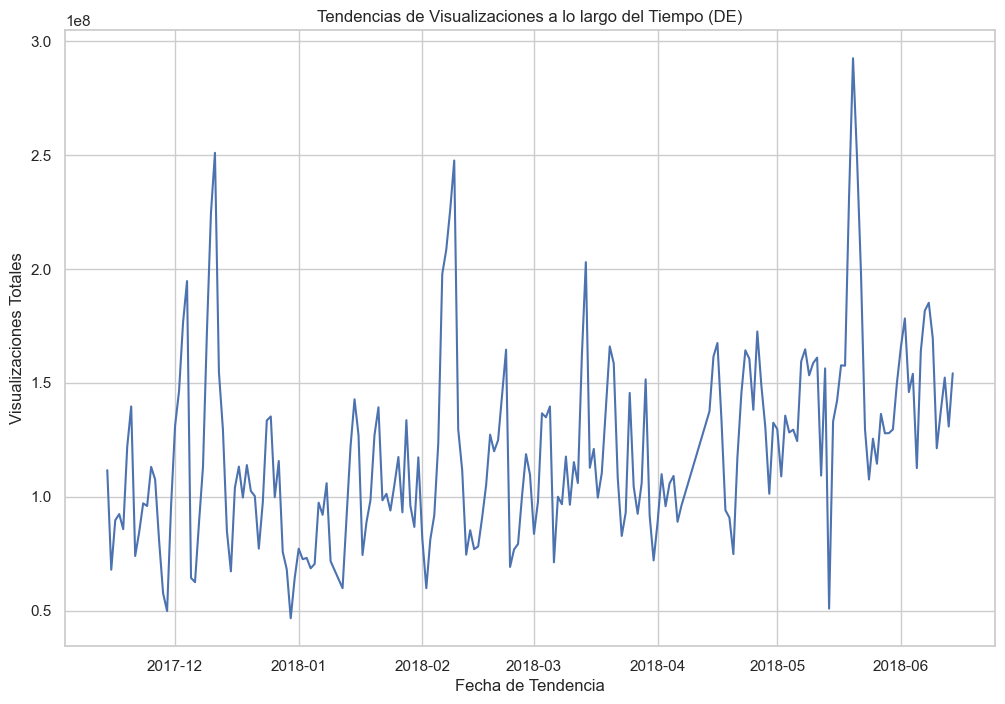

C:\Users\USUARIO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\USUARIO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


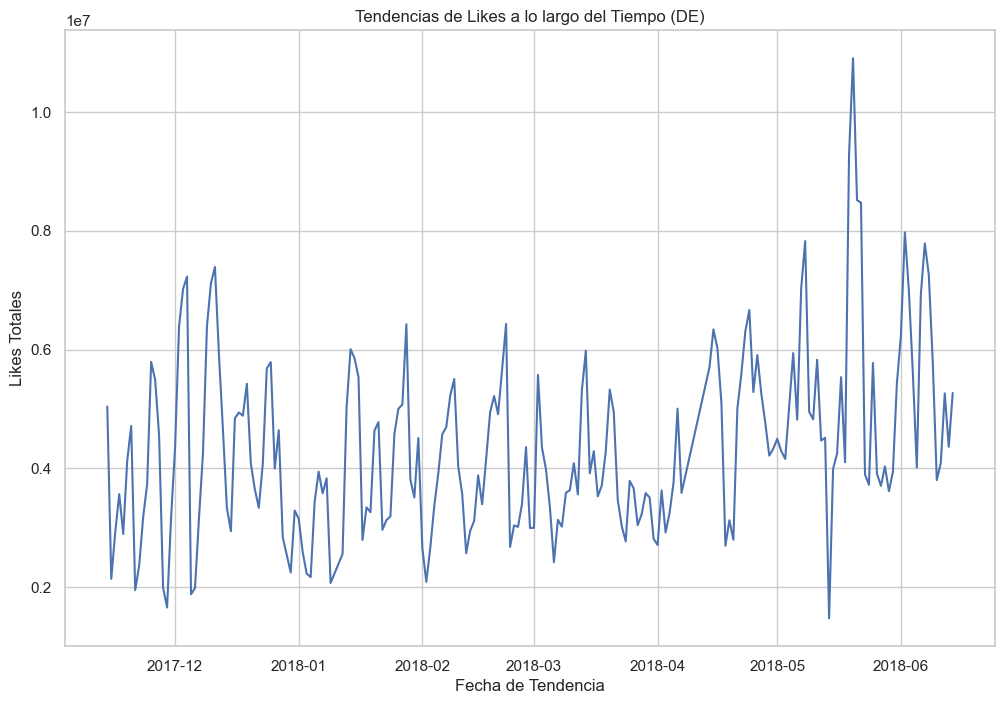

In [68]:
# Tendencias de visualizaciones a lo largo del tiempo
plt.figure(figsize=(12, 8))
sns.lineplot(data=de_videos.groupby('trending_date')['views'].sum().reset_index(), x='trending_date', y='views')
plt.title('Tendencias de Visualizaciones a lo largo del Tiempo (DE)')
plt.xlabel('Fecha de Tendencia')
plt.ylabel('Visualizaciones Totales')
plt.show()

# Tendencias de likes a lo largo del tiempo
plt.figure(figsize=(12, 8))
sns.lineplot(data=de_videos.groupby('trending_date')['likes'].sum().reset_index(), x='trending_date', y='likes')
plt.title('Tendencias de Likes a lo largo del Tiempo (DE)')
plt.xlabel('Fecha de Tendencia')
plt.ylabel('Likes Totales')
plt.show()


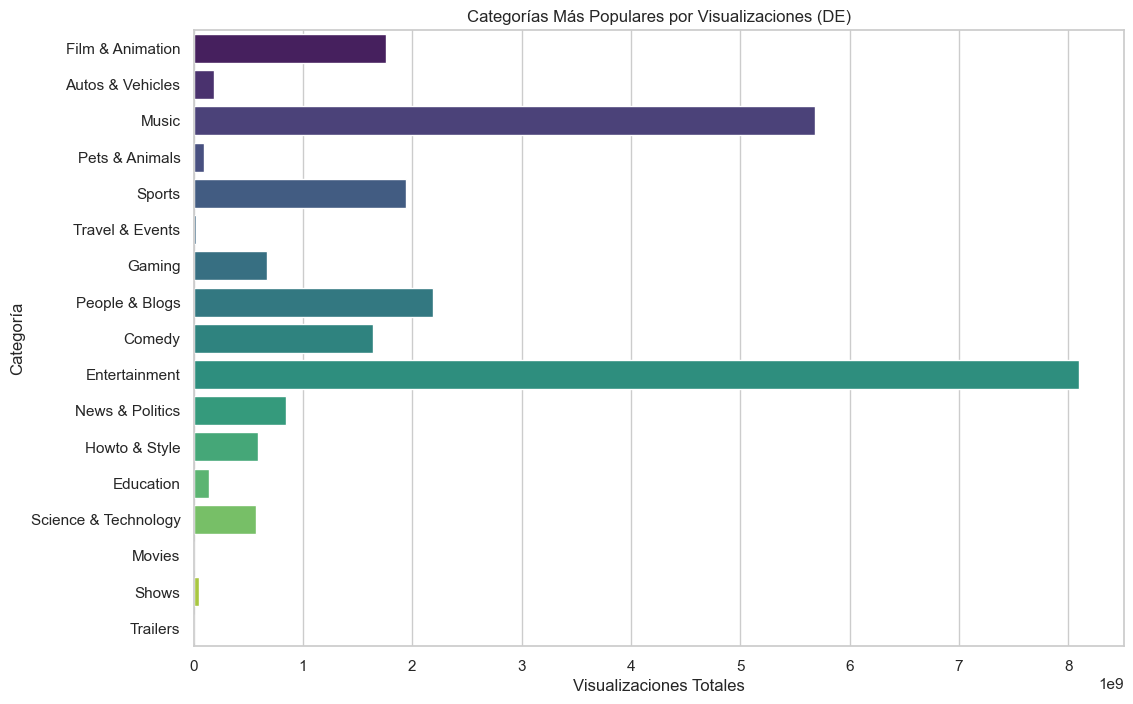

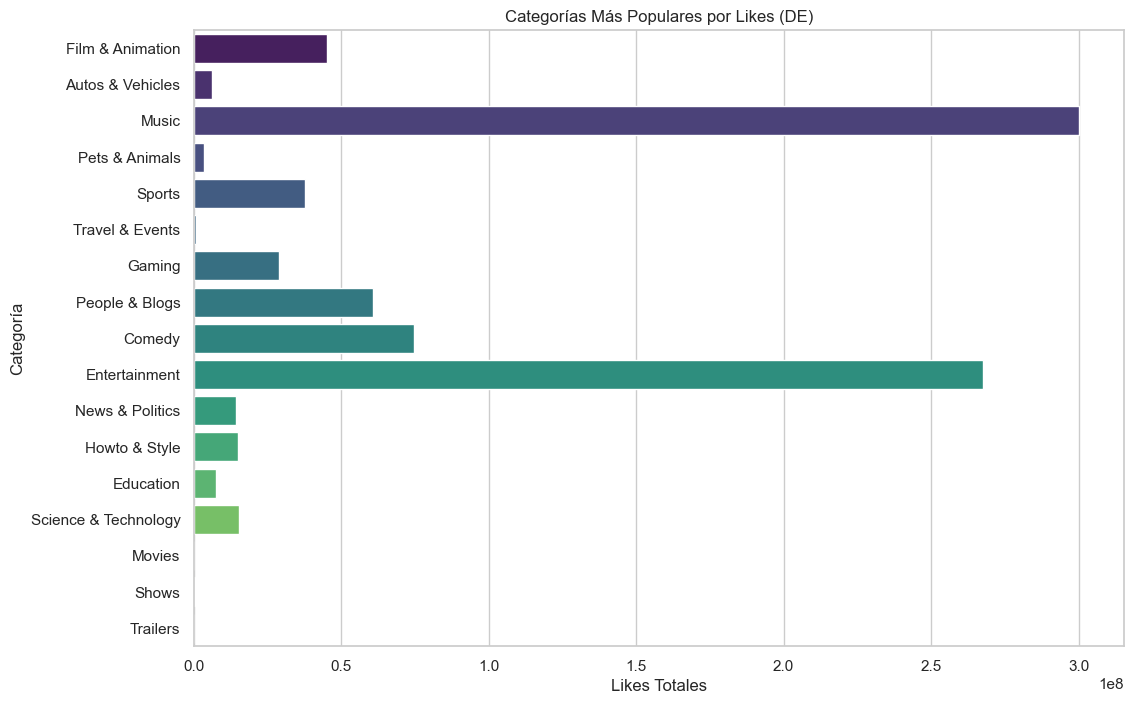

In [70]:
# Categorías más populares en términos de visualizaciones
plt.figure(figsize=(12, 8))
popular_categories_views = de_videos.groupby('category_id')['views'].sum().reset_index()
popular_categories_views = popular_categories_views.merge(de_categories, on='category_id')
sns.barplot(data=popular_categories_views, x='views', y='category', palette='viridis')
plt.title('Categorías Más Populares por Visualizaciones (DE)')
plt.xlabel('Visualizaciones Totales')
plt.ylabel('Categoría')
plt.show()

# Categorías más populares en términos de likes
plt.figure(figsize=(12, 8))
popular_categories_likes = de_videos.groupby('category_id')['likes'].sum().reset_index()
popular_categories_likes = popular_categories_likes.merge(de_categories, on='category_id')
sns.barplot(data=popular_categories_likes, x='likes', y='category', palette='viridis')
plt.title('Categorías Más Populares por Likes (DE)')
plt.xlabel('Likes Totales')
plt.ylabel('Categoría')
plt.show()


In [72]:
de_videos = pd.read_csv(os.path.join(base_path, 'DEvideos_cc50_202101.csv'))

de_categories = os.path.join(base_path, 'DE_category_id.json')

with open(de_categories, 'r') as f:
    de_categories = pd.DataFrame(json.load(f)['items'])

de_categories = extract_category_info(de_categories)


C:\Users\USUARIO\AppData\Local\Temp\ipykernel_5392\2579554487.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categories_df['category_id'] = categories_df['id'].astype(int)


In [73]:
# Definir una función para procesar todos los datos
def preprocess_and_create_metrics(videos, categories):
    videos = convert_date_format(videos)
    videos = add_date_features(videos)
    videos = create_new_metrics(videos)
    return videos

# Aplicar a todos los conjuntos de datos

de_videos = preprocess_and_create_metrics(de_videos, de_categories)


Visualizaciones para DE


C:\Users\USUARIO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


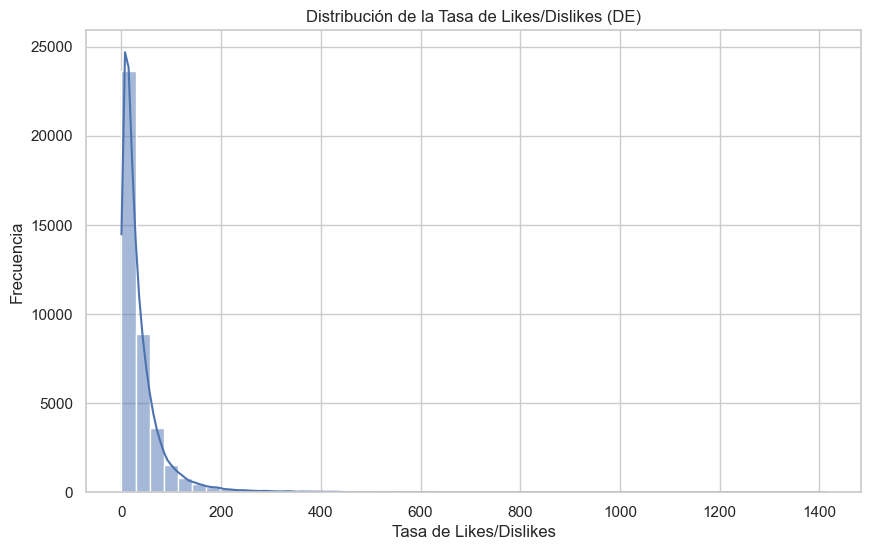

C:\Users\USUARIO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


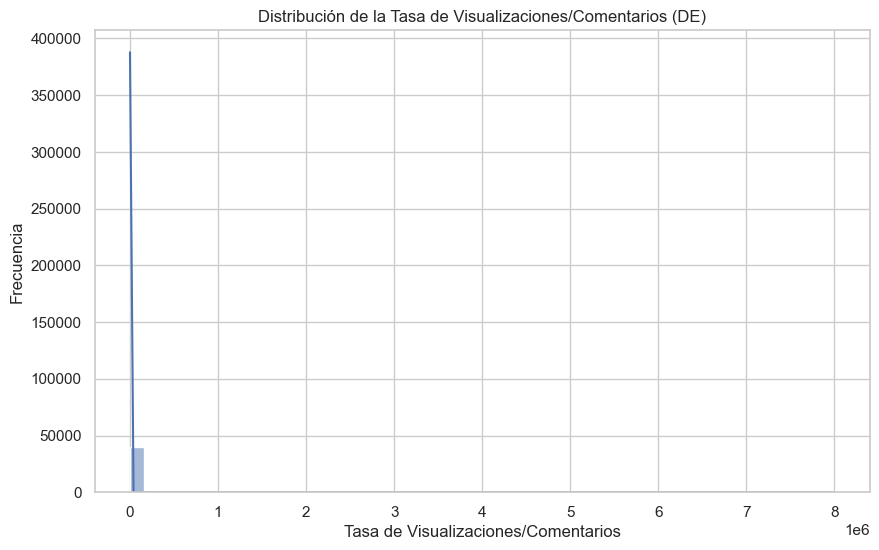

C:\Users\USUARIO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\USUARIO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


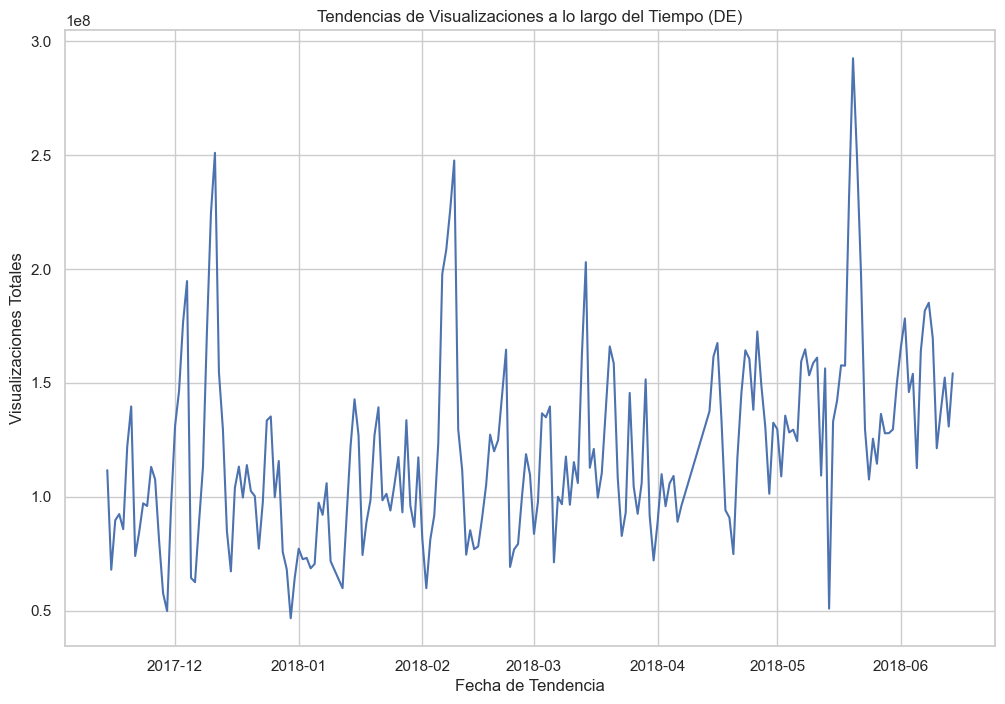

C:\Users\USUARIO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\USUARIO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


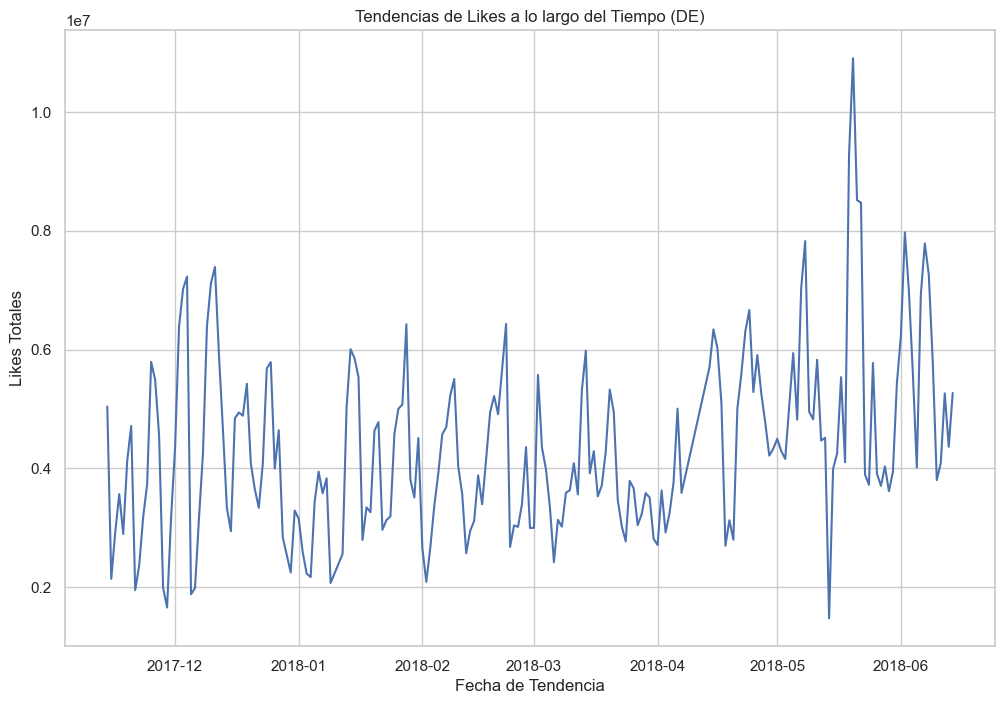

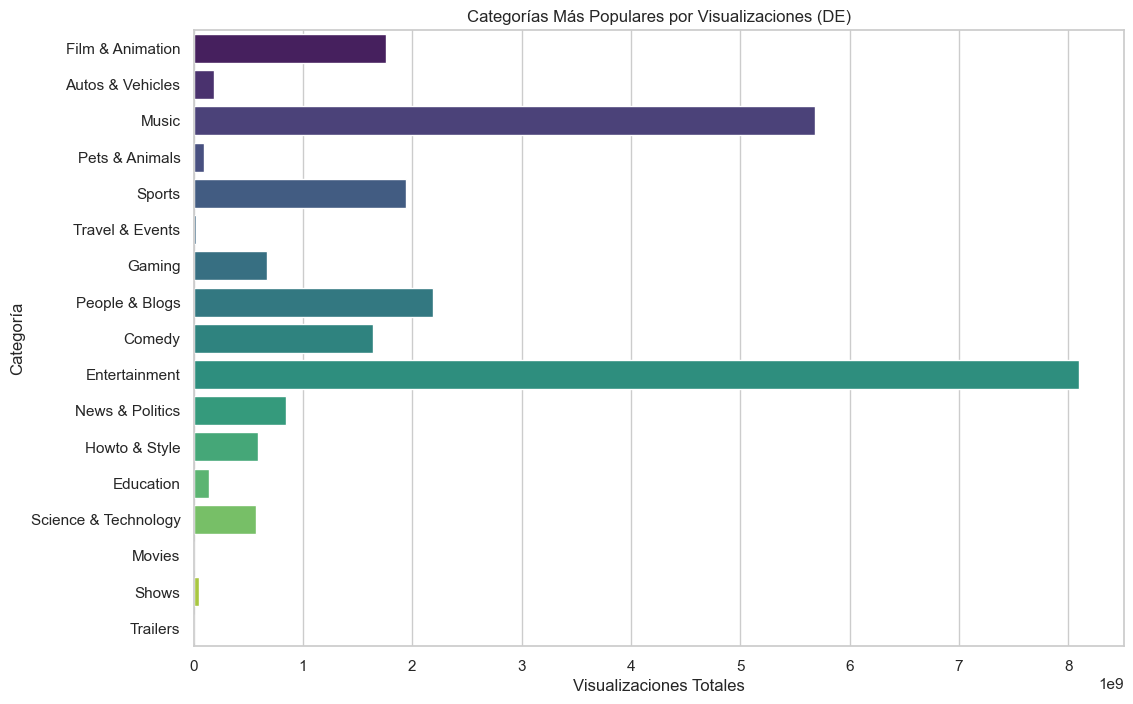

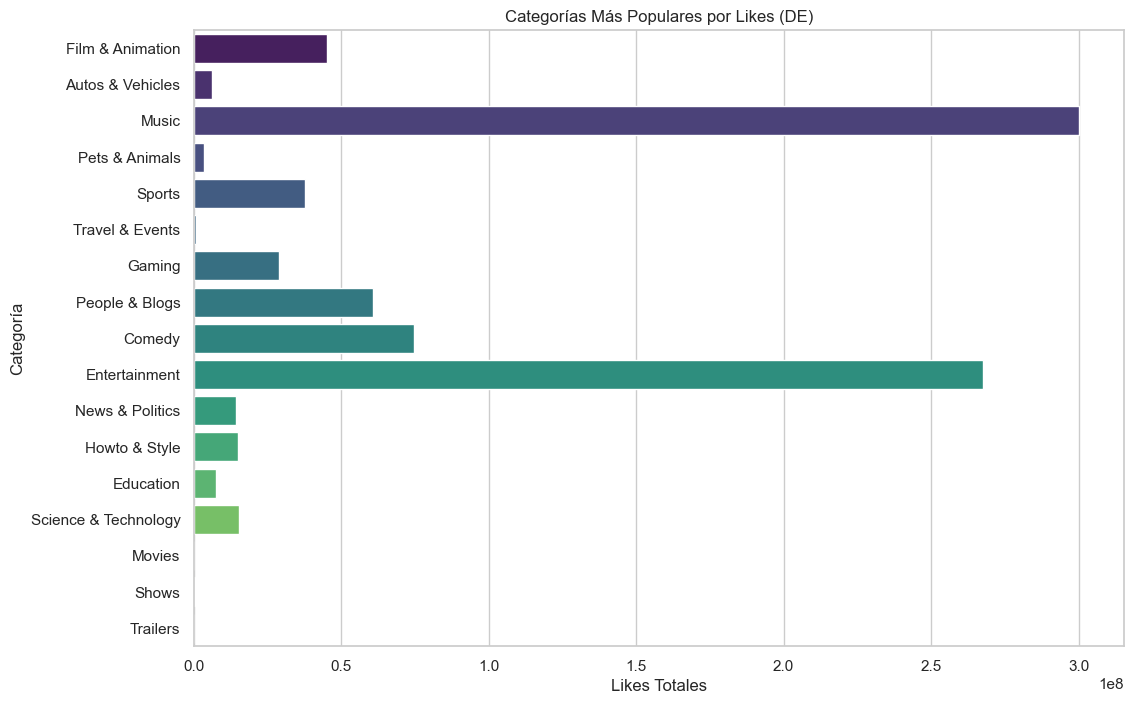

In [78]:
# Definir una función para crear gráficos de distribución de métricas
def plot_metric_distribution(videos, metric, title, xlabel, ylabel):
    plt.figure(figsize=(10, 6))
    sns.histplot(videos[metric], bins=50, kde=True)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

# Definir una función para crear gráficos de tendencias a lo largo del tiempo
def plot_trends_over_time(videos, metric, title, xlabel, ylabel):
    plt.figure(figsize=(12, 8))
    sns.lineplot(data=videos.groupby('trending_date')[metric].sum().reset_index(), x='trending_date', y=metric)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

# Definir una función para crear gráficos de categorías populares
def plot_popular_categories(videos, categories, metric, title, xlabel, ylabel):
    plt.figure(figsize=(12, 8))
    popular_categories = videos.groupby('category_id')[metric].sum().reset_index()
    popular_categories = popular_categories.merge(categories, on='category_id')
    sns.barplot(data=popular_categories, x=metric, y='category', palette='viridis')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

# Aplicar las visualizaciones a cada conjunto de datos
countries = {'DE': (de_videos, de_categories)}

for country, (videos, categories) in countries.items():
    print(f"Visualizaciones para {country}")
    
    # Distribución de 'like_dislike_ratio'
    plot_metric_distribution(videos, 'like_dislike_ratio', 
                             f'Distribución de la Tasa de Likes/Dislikes ({country})', 
                             'Tasa de Likes/Dislikes', 'Frecuencia')
    
    # Distribución de 'view_comment_ratio'
    plot_metric_distribution(videos, 'view_comment_ratio', 
                             f'Distribución de la Tasa de Visualizaciones/Comentarios ({country})', 
                             'Tasa de Visualizaciones/Comentarios', 'Frecuencia')
    
    # Tendencias de visualizaciones a lo largo del tiempo
    plot_trends_over_time(videos, 'views', 
                          f'Tendencias de Visualizaciones a lo largo del Tiempo ({country})', 
                          'Fecha de Tendencia', 'Visualizaciones Totales')
    
    # Tendencias de likes a lo largo del tiempo
    plot_trends_over_time(videos, 'likes', 
                          f'Tendencias de Likes a lo largo del Tiempo ({country})', 
                          'Fecha de Tendencia', 'Likes Totales')
    
    # Categorías más populares en términos de visualizaciones
    plot_popular_categories(videos, categories, 'views', 
                            f'Categorías Más Populares por Visualizaciones ({country})', 
                            'Visualizaciones Totales', 'Categoría')
    
    # Categorías más populares en términos de likes
    plot_popular_categories(videos, categories, 'likes', 
                            f'Categorías Más Populares por Likes ({country})', 
                            'Likes Totales', 'Categoría')


In [80]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

def predict_likes_and_plot(videos):
    # Seleccionar las características y la variable objetivo
    X = videos[['views', 'comment_count', 'dislikes']]
    y = videos['likes']
    
    # Dividir los datos en conjuntos de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Crear y entrenar el modelo
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Hacer predicciones
    predictions = model.predict(X_test)
    
    # Crear un DataFrame con los valores reales y las predicciones
    results = pd.DataFrame({'Real': y_test, 'Predicted': predictions})
    
    # Graficar los resultados
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=results, x='Real', y='Predicted', alpha=0.5)
    plt.plot([0, results['Real'].max()], [0, results['Real'].max()], color='red', lw=2)  # Línea de referencia
    plt.title('Predicción de Likes vs. Likes Reales')
    plt.xlabel('Likes Reales')
    plt.ylabel('Likes Predichos')
    plt.show()
    
    return model, results


Predicciones para Alemania:


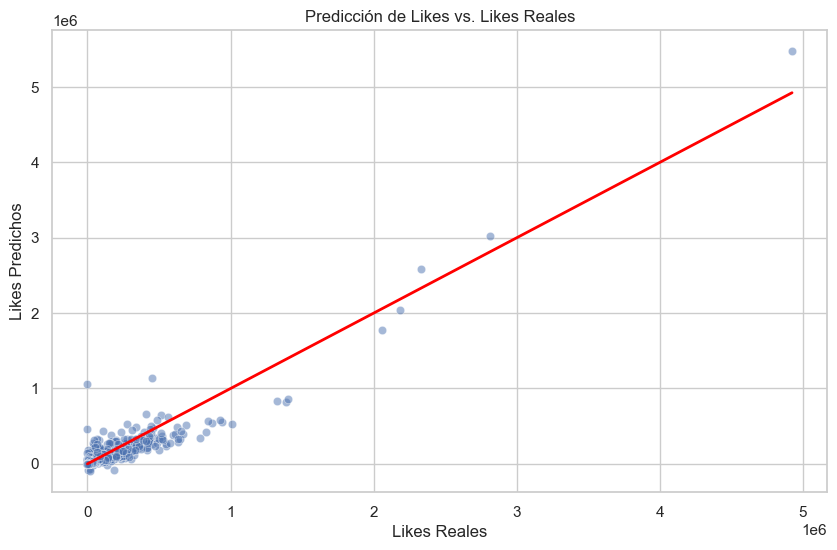

In [82]:
# Predicciones para Alemania
print("Predicciones para Alemania:")
de_model, de_results = predict_likes_and_plot(de_videos)


In [84]:
def trending_over_time(videos):
    videos['trending_date'] = pd.to_datetime(videos['trending_date'], format='%y.%d.%m')
    trending_volume = videos.groupby(videos['trending_date'].dt.to_period('M')).size().reset_index(name='count')
    return trending_volume

# Aplicamos la función a los datos de Alemania
trending_volume_de = trending_over_time(de_videos)
print(trending_volume_de)

  trending_date  count
0       2017-11   3399
1       2017-12   6199
2       2018-01   5793
3       2018-02   5568
4       2018-03   6183
5       2018-04   4793
6       2018-05   6142
7       2018-06   2763
